# Airline Passenger Satisfaction

In [1]:
#Importing the basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csv file
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


As we know, first two columns would have no effect on the model, we will remove them

In [4]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [5]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [7]:
#lets convert int64 type to categorical type because those represent categories only
cat = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,cat] = df.iloc[:,cat].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

## Let's check for missing values

In [9]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

We have 310 missing values in the 'Arrival Delay in Minutes' Column. We will fix it by simply replacing the null values from the mean of the the data of the same column.

In [10]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(),inplace=True)

In [11]:
df.isna().sum() #No null values

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [12]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


## Encoding some variables

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   #Creating a label encoder instance

In [15]:
df['Gender'] = le.fit_transform(df['Gender']) #1 for male, 0 for Female

In [18]:
df['Class'] = le.fit_transform(df['Class']) #1 for eco, 0 for business, 2 for eco pluss

In [19]:
df['Type of Travel'] = le.fit_transform(df['Type of Travel']) #1 for personal, 0 for business

In [20]:
df['Customer Type'] = le.fit_transform(df['Customer Type']) #1 for unloyal, 0 for loyal

# Exploratory Data Analysis

Let's start with a basic heatmap based on the correlation matrix of the dataset.

<AxesSubplot:>

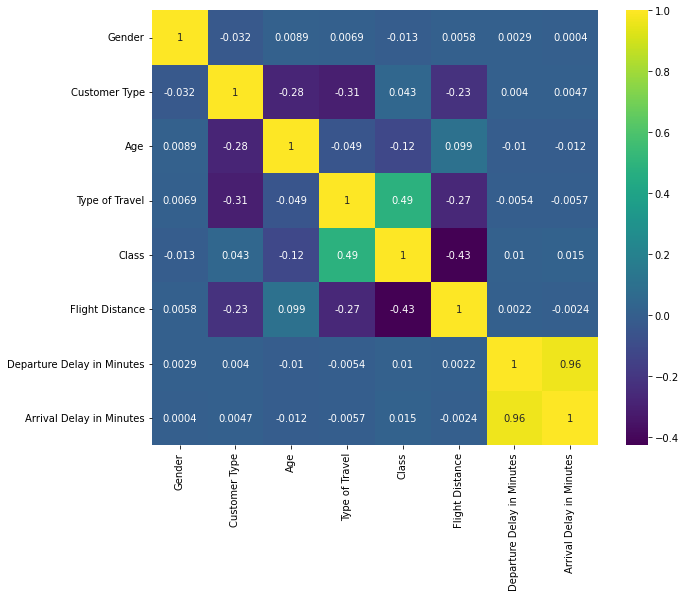

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Here we can see how highly correlated 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' is. This means that there could be a linear relationship between them and we could predict one from the other. So, we can drop any one of the columns. It is pretty natural that if there is departure delay, the arrival will happen with a delay too. That is why these variables are highly correlated

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

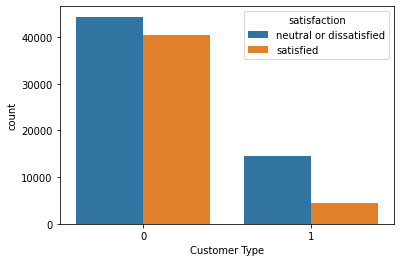

In [28]:
sns.countplot(data=df,x='Customer Type',hue='satisfaction') #1 for unloyal, 0 for loyal

we can se how most people are dissatisfied or neutral.

<AxesSubplot:xlabel='Class', ylabel='Age'>

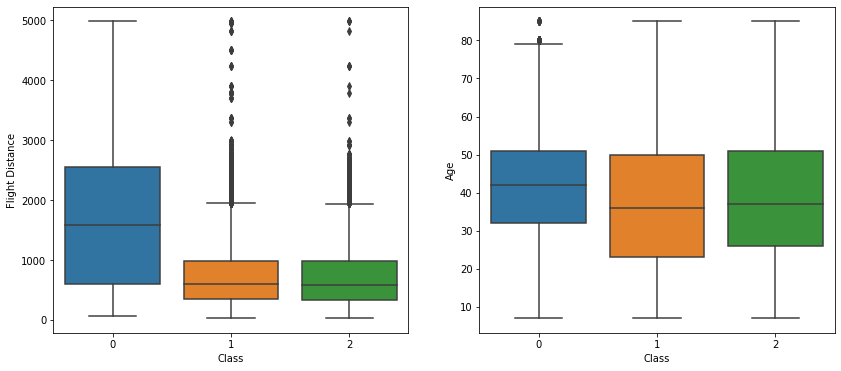

In [35]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.boxplot(data=df,x='Class',y='Flight Distance',ax=ax[0])
sns.boxplot(data=df,x='Class',y='Age',ax=ax[1]) #1 for eco, 0 for business, 2 for eco pluss

Here we can see, how as the flight distance increases, people are more probable to buy business class(0). There isn't much to deduce from the scond plot. There isn't much difference in selection of class with respect to the age. **From the histogram made below, we can more clearly see the relationship between Flight Distance and Class.**

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

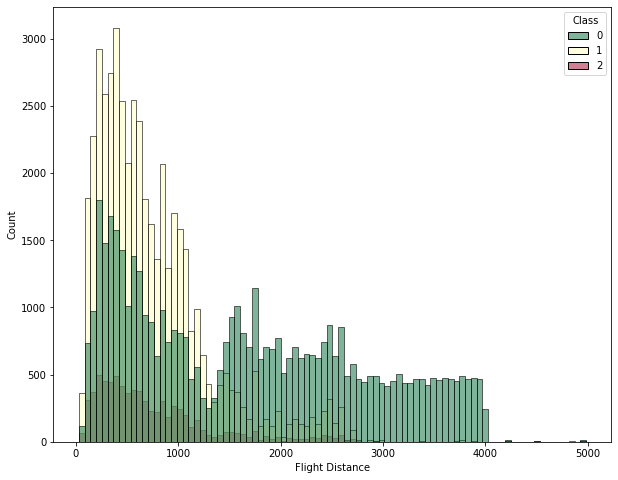

In [38]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Flight Distance',hue='Class',palette='RdYlGn_r')

<AxesSubplot:xlabel='Gender', ylabel='count'>

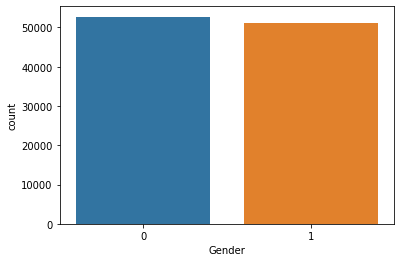

In [39]:
sns.countplot(data=df,x='Gender')

**We can see that the number of male and female travellers are almost the same**

<AxesSubplot:xlabel='Inflight entertainment', ylabel='count'>

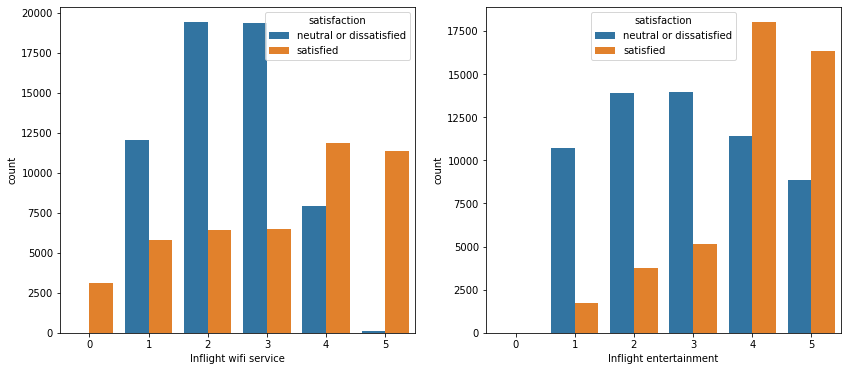

In [43]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.countplot(data=df,x='Inflight wifi service',hue='satisfaction',ax=ax[0])
sns.countplot(data=df,x='Inflight entertainment',hue='satisfaction',ax=ax[1])

Here, we notice a very fun thing, WIFI played a huge role in satisfying customers. We can see how people who rated the wifi service 5 were satisfied with the flight. Nobody rated inflight entertainment 0, also most of the people who voted 4 or 5 to the service were satisfied with the flight.

<AxesSubplot:xlabel='Leg room service', ylabel='Flight Distance'>

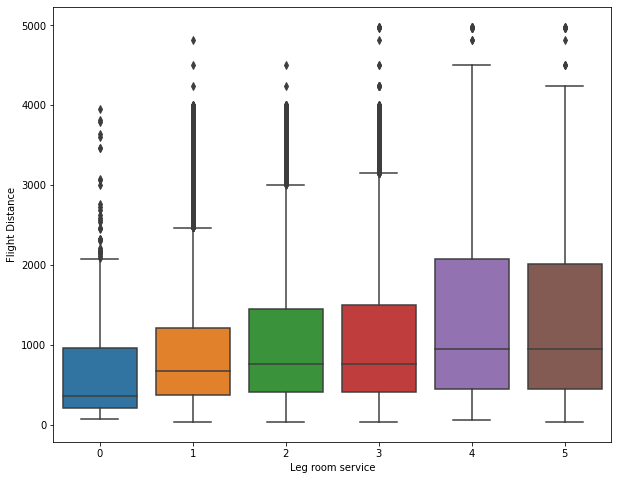

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='Flight Distance',x='Leg room service')

Another thing, Which is just some common understanding that people longer time on the flight rated high for the leg room service.

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

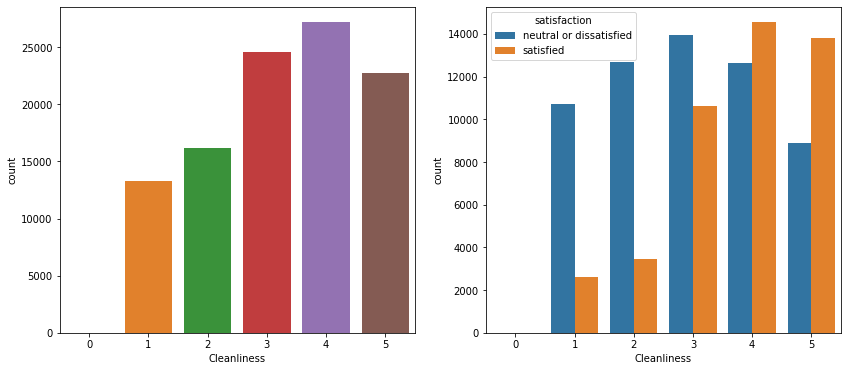

In [50]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.countplot(data=df,x='Cleanliness',ax=ax[0])
sns.countplot(data=df,x='Cleanliness',hue='satisfaction',ax=ax[1])

Most people rated 4 for the cleanliness in the flight and those who gave higher rating of cleanliness were satisfied with the flight. 

**We summarized that:**
1) Drop 'Departure Delay in Minutes'.

2) We can see not all factors play a major role in a person being satisfied, neutral or dissatisfied.

In [51]:
df.drop('Departure Delay in Minutes',axis=1,inplace=True)

**Let is also encode the target(satisfaction) variable.**

In [53]:
df['satisfaction'] = le.fit_transform(df['satisfaction']) #1 for satisfied, 0 nuetral or dissatisfied

In [54]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0.0,1


# Modelling and predictions

In [55]:
#Splitting the data
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

As we noticed in the eda that not all features are playing a major role. Let us apply some feature selection technique to find out the best features. As the data is categorical, I used the chi2 test with SelectKBest to find out the number of features to be chosen.

I took a very interesting approach. As it is always difficult to find out the perfect K value, I made a plot test out with k from 1 to 21 columns (because the dataset has 21 columns max). We will kinda use the elbow method to find out the best K value. The machine learning model I use is RandomForestClassifier.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import SelectKBest,chi2

In [60]:
a=[]
for i in range(1,22):
    ske = SelectKBest(chi2,k=i)
    ske.fit(X_train,y_train)
    X_train_fs = ske.transform(X_train)
    X_test_fs = ske.transform(X_test)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train_fs,y_train)
    pred_ = rfc.predict(X_test_fs)
    a.append(accuracy_score(y_test,pred_))

Text(0, 0.5, 'accuracy')

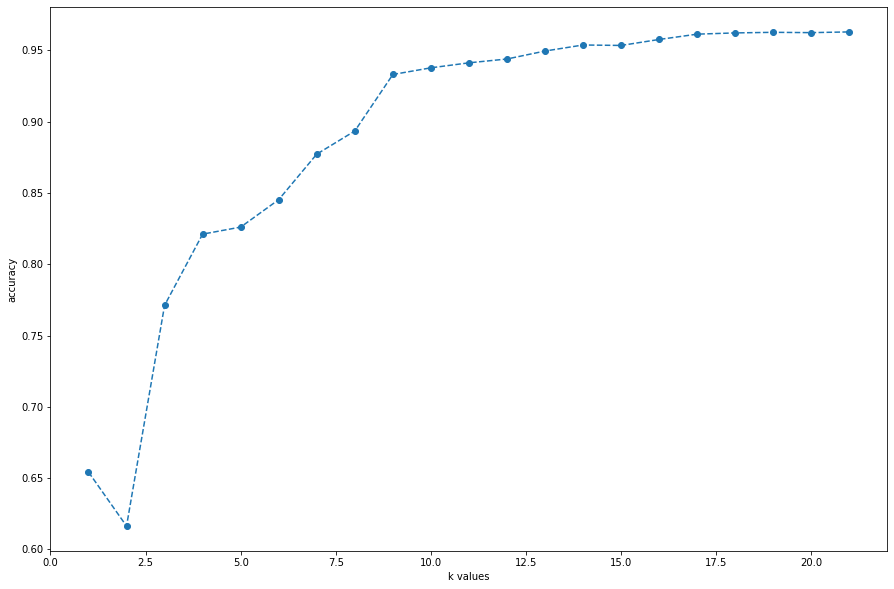

In [61]:
plt.figure(figsize=(15,10))
plt.plot(range(1,22),a,ls='dashed',marker='o')
plt.xlabel('k values')
plt.ylabel('accuracy')

**We can notice the elbow effect at k=8, but lets go and take k=17, because after that, the graph is linear**

In [62]:
ske = SelectKBest(chi2,k=17)
ske.fit(X_train,y_train)
X_train_fs = ske.transform(X_train)
X_test_fs = ske.transform(X_test)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_fs,y_train)
pred_ = rfc.predict(X_test_fs)

In [65]:
print(confusion_matrix(y_test,pred_),'\n\n',classification_report(y_test,pred_),'\n\n',np.round(accuracy_score(y_test,pred_)*100))

[[17260   374]
 [  839 12699]] 

               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17634
           1       0.97      0.94      0.95     13538

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172
 

 96.0


This Model predicts with an accuracy score of 96%.

### This was my first time using some feature selection method. Do let me know if I had taken the right approach or there could be some other good approach. Do upvote if you liked the kernel. 

## Thankyou :)